In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd()

'/content'

In [ ]:
!ls '/content/drive/MyDrive/DAEN690/'

train.csv


In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/MyDrive/DAEN690/train.csv')
print(df)

                               image_id          class_name  class_id rad_id  \
0      50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1      21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2      9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3      051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4      063319de25ce7edb9b1c6b8881290140          No finding        14    R10   
...                                 ...                 ...       ...    ...   
67909  936fd5cff1c058d39817a08f58b72cae          No finding        14     R1   
67910  ca7e72954550eeb610fe22bf0244b7fa          No finding        14     R1   
67911  aa17d5312a0fb4a2939436abca7f9579          No finding        14     R8   
67912  4b56bc6d22b192f075f13231419dfcc8        Cardiomegaly         3     R8   
67913  5e272e3adbdaafb07a7e84a9e62b1a4c          No finding        14    R16   

        x_min   y_min   x_max   y_max  

In [ ]:
unique_df = df.drop_duplicates()


In [ ]:
df.shape


(67914, 8)

In [ ]:
unique_df.shape

(67914, 8)

In [ ]:
df['image_id'].nunique()

15000

In [ ]:
df[['image_id', 'class_id']].nunique()

image_id    15000
class_id       15
dtype: int64

In [ ]:
df_plot = df[['image_id', 'class_name']].drop_duplicates()
df_plot.count()


image_id      25971
class_name    25971
dtype: int64

In [ ]:
df_plt = df_plot.groupby(['class_name'])['image_id'].count().reset_index()
df_plt.columns = ['Abnormality', 'Count']

In [ ]:
#df[['image_id', 'class_id']].drop_duplicates().sort_values('image_id')
df_plt


,Abnormality,Count
0,Aortic enlargement,3067
1,Atelectasis,186
2,Calcification,452
3,Cardiomegaly,2300
4,Consolidation,353
5,ILD,386
6,Infiltration,613
7,Lung Opacity,1322
8,No finding,10606
9,Nodule/Mass,826


In [ ]:
df.unique()

In [ ]:
df.groupby(df.columns.tolist(), as_index=False).size()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,size
0,0005e8e3701dfb1dd93d53e2ff537b6e,Consolidation,4,R8,932.0,567.0,1197.0,896.0,1
1,0005e8e3701dfb1dd93d53e2ff537b6e,Infiltration,6,R10,900.0,587.0,1205.0,888.0,1
2,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R10,900.0,587.0,1205.0,888.0,1
3,0005e8e3701dfb1dd93d53e2ff537b6e,Lung Opacity,7,R9,905.0,583.0,1203.0,890.0,1
4,0005e8e3701dfb1dd93d53e2ff537b6e,Nodule/Mass,8,R8,932.0,567.0,1197.0,896.0,1
...,...,...,...,...,...,...,...,...,...
36091,ffe6f9fe648a7ec29a50feb92d6c15a4,Cardiomegaly,3,R9,1144.0,1851.0,2297.0,2384.0,1
36092,ffe6f9fe648a7ec29a50feb92d6c15a4,Other lesion,9,R10,563.0,1148.0,593.0,1185.0,1
36093,ffeffc54594debf3716d6fcd2402a99f,Aortic enlargement,0,R10,1302.0,754.0,1570.0,1146.0,1
36094,ffeffc54594debf3716d6fcd2402a99f,Aortic enlargement,0,R8,1224.0,733.0,1560.0,1176.0,1


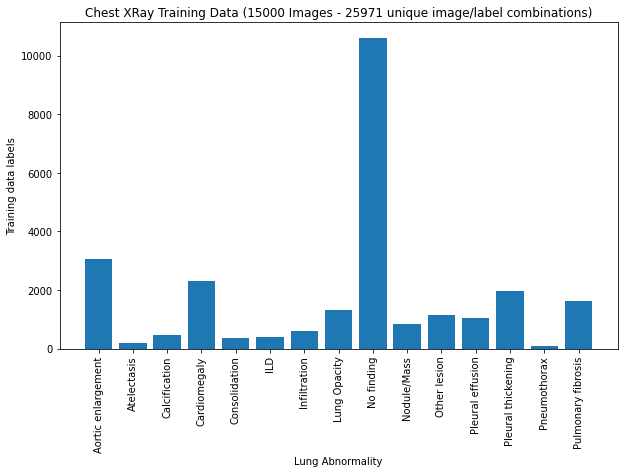

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(df_plt['Abnormality'], df_plt['Count'])
#plt.show()

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Chest XRay Training Data (15000 Images - 25971 unique image/label combinations)")
plt.xlabel("Lung Abnormality")
plt.ylabel("Training data labels")
plt.show()